<a href="https://colab.research.google.com/github/Radiant-O/MonkeyPox-Tweets-Sentiment-Classification/blob/main/Monkeypox_Tweets_Sentiment_Extraction%2C_EDA_%26_Model%20v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
vencerlanz09_monkeypox_tweets_path = kagglehub.dataset_download('vencerlanz09/monkeypox-tweets')

print('Data source import complete.')


100%|██████████| 7.72M/7.72M [00:00<00:00, 52.1MB/s]

Extracting files...


Data source import complete.


## Overview

Imagine a world suddenly grappling with an unfamiliar health threat. News breaks, uncertainty looms, and naturally, people turn to social media a bustling town square of information, opinions, and anxieties. This was the scene when the monkeypox virus began spreading earlier this year. Suddenly, a disease that had previously been confined to specific regions was making headlines globally, and Twitter (now known as X) became a vibrant, sometimes chaotic, hub for discussion.

In times of public health concern, understanding the prevailing sentiment within these online conversations is crucial. Are people concerned, dismissive, or perhaps sharing accurate information? Is misinformation spreading rapidly, fueling fear or distrust? The sheer volume of tweets, each a tiny snapshot of public thought, holds valuable clues, but analyzing them manually is an impossible task. This is where the power of data science and sentiment analysis comes into play.

Our project delves into this digital discourse, specifically focusing on the vast collection of tweets related to monkeypox. We aim to move beyond simply observing these conversations and instead, quantify the underlying sentiment whether it's positive, negative, or neutral. Think of it as taking the pulse of the online world concerning this particular health challenge.

 ##### **The Heart of the Matter: The Problem We're Tackling**

The central problem we're addressing is the need to automatically and accurately classify the sentiment of a large volume of social media text related to a public health topic, in this case, monkeypox. Here's a breakdown of the challenges:

* Scale: The sheer number of tweets generated daily is immense, making manual analysis impractical and time-consuming.
* Noise: Social media text is often informal, contains slang, abbreviations, emojis (though we'll handle those), and irrelevant information, which makes traditional text processing challenging.
* Nuance: Human language is nuanced. A tweet might contain both positive and negative elements, or its sentiment might be implied rather than explicitly stated. Our system needs to navigate this complexity.
* Context: Understanding the sentiment of a tweet often requires understanding the context in which it was written. While our approach focuses on the text itself, we acknowledge this broader challenge.

#### **Why Does This Matter? The Significance of Our Work**

Successfully classifying the sentiment of these discussions has real-world implications:

* Informing Public Health Messaging: By understanding public sentiment, health organizations can tailor their communication strategies to address concerns, debunk myths, and build trust. If a large volume of tweets express fear, public health messages can focus on reassurance and accurate information about transmission and prevention.
* Tracking Public Response: Sentiment analysis can provide insights into how the public is reacting to the unfolding situation, including compliance with public health guidelines or the level of public anxiety.
* Identifying Misinformation: Negative sentiment can sometimes be linked to the spread of misinformation or conspiracy theories. Analyzing negative tweets might help identify these patterns and enable targeted interventions.
* Gauging the Effectiveness of Interventions: By tracking sentiment over time, we might be able to gauge the public's reaction to specific public health measures or announcements.

Therefore, this project isn't just a technical exercise in applying a machine learning algorithm. It's about developing a tool that can help us better understand and navigate the complex landscape of public opinion during a health crisis. Our goal is to build a robust sentiment classification system using the Support Vector Machine (SVM) algorithm, specifically tailored to the unique characteristics of tweets about monkeypox. This will provide a valuable lens through which to view the online conversation and contribute to a more informed public health response.

## Methodology

### Data Description

---



The foundation of this sentiment classification project rests upon a valuable collection of tweets related to the monkeypox virus. This dataset was sourced from Kaggle, a prominent platform for data science and machine learning resources. Specifically, we utilized the dataset titled "Monkeypox Tweets" published by user vencerlanz09.

This dataset comprises a compilation of tweets collected over a specific period, capturing public discourse surrounding the monkeypox outbreak. The data was obtained by scraping tweets containing relevant keywords or hashtags related to monkeypox. It's important to note that the dataset is provided as a collection of individual CSV files, organized by the date of collection (e.g., mpox-08-19-2022.csv).

To create a comprehensive dataset for our analysis, we combined all these individual CSV files into a single, unified Pandas DataFrame. This process involved:

1. Identifying the files: Using the glob module, we programmatically identified all CSV files with the pattern mpox-*.csv within the specified Kaggle input directory /kaggle/input/monkeypox-tweets/.
2. Concatenating the data: The pd.concat function was then used to merge the contents of all identified CSV files into a single DataFrame, ensuring the ignore_index=True argument was used to handle the indexing correctly across multiple files.
The resulting combined dataset provides a rich
source of raw tweet data. It initially contained several columns, but for the purpose of our sentiment analysis, we focused on the following key features:

- date: The date when the tweet was posted. This column can be valuable for analyzing temporal trends in sentiment.
- time: The time when the tweet was posted, providing further granularity for temporal analysis.
- id: A unique identifier for each tweet. While not directly used in the sentiment classification model, it's essential for data management and potential future analysis.
- tweet: This is the core feature of our dataset, the raw text content of the tweet. This column contains the unprocessed language used by users on Twitter.
- language: The language in which the tweet was written. While our current analysis focuses on English tweets (as implied by the preprocessing steps like using English stopwords), this column allows for potential future multilingual sentiment analysis.
- replies_count: The number of replies the tweet received.
- retweets_count: The number of times the tweet was retweeted.
- likes_count: The number of likes the tweet received.

Initially, the combined dataset had (95246, 36) rows and columns. After selecting the relevant columns for our analysis, the refined dataset used for preprocessing and modeling has 95246 rows and 8 columns.

A crucial step in preparing the data was to check for missing values. Fortunately, our analysis revealed no null values across the selected columns, which is beneficial for downstream processing and modeling.

It's important to acknowledge that while this dataset provides a valuable snapshot of online discussions, it represents a sample of tweets and may not encompass the entirety of the conversation around monkeypox on Twitter. The data collection method and the inherent nature of social media data can introduce potential biases. For instance, the dataset might be skewed towards certain demographics or viewpoints prevalent on the platform. These factors should be considered when interpreting the results of the sentiment analysis.

In [ ]:
# !pip install emot --user
!pip install emot


## Importing necessities

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import string
import nltk
import re
import random
import plotly.express as px
import requests
# import keras.backend as K
# import tensorflow as tf

from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.corpus import stopwords, words
from io import BytesIO
from PIL import Image
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
# from keras.models import load_model
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
# from keras.metrics import Precision, Recall
# from tensorflow.keras.optimizers import SGD, RMSprop

# Add these imports for SVM and evaluation
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

import os

try:
    from emot.emo_unicode import UNICODE_EMOJI
    print("Emot imported successfully!")
except ModuleNotFoundError:
    print("Error: emot module not found after restart. Please check installation.")

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng')
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Emot imported successfully!
/kaggle/input/monkeypox-tweets/mpox-08-23-2022.csv
/kaggle/input/monkeypox-tweets/mpox-08-22-2022.csv
/kaggle/input/monkeypox-tweets/mpox-08-21-2022.csv
/kaggle/input/monkeypox-tweets/mpox-08-26-2022.csv
/kaggle/input/monkeypox-tweets/mpox-09-03-2022.csv
/kaggle/input/monkeypox-tweets/mpox-08-25-2022.csv
/kaggle/input/monkeypox-tweets/mpox-08-20-2022.csv
/kaggle/input/monkeypox-tweets/mpox-09-02-2022.csv
/kaggle/input/monkeypox-tweets/mpox-08-27-2022.csv
/kaggle/input/monkeypox-tweets/mpox-08-31-2022.csv
/kaggle/input/monkeypox-tweets/mpox-08-19-2022.csv
/kaggle/input/monkeypox-tweets/mpox-08-29-2022.csv
/kaggle/input/monkeypox-tweets/mpox-09-01-2022.csv
/kaggle/input/monkeypox-tweets/mpox-08-30-2022.csv
/kaggle/input/monkeypox-tweets/mpox-08-24-2022.csv
/kaggle/input/monkeypox-tweets/mpox-08-28-2022.csv


**Note:**
- It seems there are many csv files for the analysis.
- Further on we need to combine all this data into one dataframe,

Let's proceed with how the data looks like...

In [ ]:
# from emot.emo_unicode import UNICODE_EMOJI

## Reading the data

In [ ]:
data1 = pd.read_csv('/kaggle/input/monkeypox-tweets/mpox-08-19-2022.csv')
data1.head()

,Unnamed: 0,date,time,id,tweet,language,replies_count,retweets_count,likes_count
0,0,2022-08-19,21:47:43,1560624556175343617,@ArtValley818_ Is his spirit animal monkey pox?,en,0,0,0
1,1,2022-08-19,21:47:38,1560624535283589123,@Sara_inquirer Hindsight is 20/20. And can pro...,en,0,0,0
2,2,2022-08-19,21:47:38,1560624532838182913,@OHAOregon Any time a child gets monkey pox I ...,en,0,0,0
3,3,2022-08-19,21:47:35,1560624522176434177,[ICYMI] WATCH | Phaahla confirms fifth Monkeyp...,en,0,0,0
4,4,2022-08-19,21:47:33,1560624514651791366,Monkeypox cancels free concert held at Souther...,en,0,0,0


**Note:**
- Now we'll be combining all the data into one dataframe.

In [ ]:
# Setting the path for joining multiple files
files = os.path.join("/kaggle/input/monkeypox-tweets/", "mpox-*.csv")

# List of merged files returned
files = glob.glob(files)

# Joining files with concat and read_csv
data = pd.concat(map(pd.read_csv, files), ignore_index=True)
data.head()

print('Shape of the combined dataset:', data.shape)

,Unnamed: 0,date,time,id,tweet,language,replies_count,retweets_count,likes_count,conversation_id,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0.0,2022-08-23,23:27:59,1562099340121980929,@larryd5674 @John_Kass @chicagosmayor @SAKimFo...,en,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2022-08-23,23:27:30,1562099216188678144,Monkeypox: An explainer and research roundup ...,en,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2022-08-23,23:27:30,1562099215957987328,About Monkeypox and HOCl makers….I’m learning ...,en,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,2022-08-23,23:27:24,1562099191836467200,La monkey pox llegó a la comunidad gay porn st...,es,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,2022-08-23,23:27:19,1562099169413763072,Many like to see the U.S. as one of the most a...,en,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Note:**
- Let's verify once, if the final dataframe contains all the csv files.

In [ ]:
files

['/kaggle/input/monkeypox-tweets/mpox-08-23-2022.csv',
 '/kaggle/input/monkeypox-tweets/mpox-08-22-2022.csv',
 '/kaggle/input/monkeypox-tweets/mpox-08-21-2022.csv',
 '/kaggle/input/monkeypox-tweets/mpox-08-26-2022.csv',
 '/kaggle/input/monkeypox-tweets/mpox-09-03-2022.csv',
 '/kaggle/input/monkeypox-tweets/mpox-08-25-2022.csv',
 '/kaggle/input/monkeypox-tweets/mpox-08-20-2022.csv',
 '/kaggle/input/monkeypox-tweets/mpox-09-02-2022.csv',
 '/kaggle/input/monkeypox-tweets/mpox-08-27-2022.csv',
 '/kaggle/input/monkeypox-tweets/mpox-08-31-2022.csv',
 '/kaggle/input/monkeypox-tweets/mpox-08-19-2022.csv',
 '/kaggle/input/monkeypox-tweets/mpox-08-29-2022.csv',
 '/kaggle/input/monkeypox-tweets/mpox-09-01-2022.csv',
 '/kaggle/input/monkeypox-tweets/mpox-08-30-2022.csv',
 '/kaggle/input/monkeypox-tweets/mpox-08-24-2022.csv',
 '/kaggle/input/monkeypox-tweets/mpox-08-28-2022.csv']

All looks good !!... We can proceed now.

In [ ]:
data = data.drop(columns={'Unnamed: 0'})
data.head()

,date,time,id,tweet,language,replies_count,retweets_count,likes_count,conversation_id,created_at,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,2022-08-23,23:27:59,1562099340121980929,@larryd5674 @John_Kass @chicagosmayor @SAKimFo...,en,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-08-23,23:27:30,1562099216188678144,Monkeypox: An explainer and research roundup ...,en,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-08-23,23:27:30,1562099215957987328,About Monkeypox and HOCl makers….I’m learning ...,en,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-08-23,23:27:24,1562099191836467200,La monkey pox llegó a la comunidad gay porn st...,es,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-08-23,23:27:19,1562099169413763072,Many like to see the U.S. as one of the most a...,en,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Note:**
- Seems there was an unnamed column. So removed it.

In [ ]:
print('Rows and columns in training dataset : ',data.shape)

Rows and columns in training dataset :  (95246, 36)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95246 entries, 0 to 95245
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             95246 non-null  object 
 1   time             95246 non-null  object 
 2   id               95246 non-null  int64  
 3   tweet            95246 non-null  object 
 4   language         95246 non-null  object 
 5   replies_count    95246 non-null  int64  
 6   retweets_count   95246 non-null  int64  
 7   likes_count      95246 non-null  int64  
 8   conversation_id  3360 non-null   float64
 9   created_at       3360 non-null   object 
 10  timezone         3360 non-null   float64
 11  user_id          3360 non-null   float64
 12  username         3360 non-null   object 
 13  name             3360 non-null   object 
 14  place            2 non-null      object 
 15  mentions         3360 non-null   object 
 16  urls             3360 non-null   object 
 17  photos      

In [ ]:
# Keeping necessary columns
data = data[['date', 'time', 'id', 'tweet', 'language', 'replies_count', 'retweets_count', 'likes_count']]
data.head()

print('Shape of the refined dataset for analysis:', data.shape)

,date,time,id,tweet,language,replies_count,retweets_count,likes_count
0,2022-08-23,23:27:59,1562099340121980929,@larryd5674 @John_Kass @chicagosmayor @SAKimFo...,en,0,0,0
1,2022-08-23,23:27:30,1562099216188678144,Monkeypox: An explainer and research roundup ...,en,0,0,0
2,2022-08-23,23:27:30,1562099215957987328,About Monkeypox and HOCl makers….I’m learning ...,en,0,0,0
3,2022-08-23,23:27:24,1562099191836467200,La monkey pox llegó a la comunidad gay porn st...,es,0,0,0
4,2022-08-23,23:27:19,1562099169413763072,Many like to see the U.S. as one of the most a...,en,0,0,0


**Note:**
- It seems that most of the columns are unnecessary for our analysis.
- So we'll keep the necessary columns out of the dataset.

In [ ]:
data.isna().sum()

,0
date,0
time,0
id,0
tweet,0
language,0
replies_count,0
retweets_count,0
likes_count,0


**Note:**
- There is no null values. That's a good thing though..

We can now proceed with further processing of our text data.

## Data preprocessing

Raw text data, especially from social media platforms like Twitter (now X), is inherently noisy and unstructured. It often contains elements that are not useful for sentiment analysis, such as URLs, mentions, punctuation, and emojis. Data preprocessing is a critical step to clean and normalize the text, transforming it into a format that is suitable for machine learning algorithms. The primary goal is to reduce noise, handle variations in language, and extract relevant features from the text.

Our preprocessing pipeline involves several steps, implemented through a series of Python functions. We applied two main processing functions: process_tweets for initial cleaning and tweet_to_words for tokenization and further text normalization specifically for feature extraction.

**Initial Tweet Cleaning (process_tweets)**

The process_tweets function performs a series of regular expression substitutions and string manipulations to remove unwanted characters and patterns from the raw tweet text. This function was applied to the original tweet column to create a cleaner version in the Selected_text column. The steps performed are as follows:

1. **Convert to Lowercase:** The entire tweet text is converted to lowercase (text = str(text).lower()). This ensures that words like "Monkeypox" and "monkeypox" are treated as the same word, reducing the vocabulary size and preventing the model from treating different capitalizations as distinct features.
2. **Remove Square Brackets:** Patterns enclosed in square brackets (\[.*?\]) are removed. These might represent annotations or other non-textual information.
3. **Remove URLs:** Web addresses and links (https?://\S+|www\.\S+) are removed. URLs do not contribute to the sentiment of a tweet and can introduce noise.
4. **Remove HTML Tags:** HTML tags (<.*?>+) are removed. These are often present in scraped data and are not relevant to the text content.
5. **Remove Mentions:** Twitter mentions starting with '@' followed by a username ((@[A-Za-z0-9_]+)) are removed. While mentions indicate interaction, they typically don't convey the sentiment of the tweet itself.
6. **Remove Punctuation:** Punctuation marks are removed ([%s]' % re.escape(string.punctuation)). Punctuation usually doesn't carry significant sentiment meaning and can create unnecessary complexity in the vocabulary.
7. **Remove Newline Characters:** Newline characters (\n) are removed to flatten the text into a single line.
8. **Remove Words Containing Digits:** Words that contain numbers (\w*\d\w*) are removed. These often represent codes, IDs, or irrelevant alphanumeric sequences.
9. **Remove Emojis:** Using the emot library to access a list of Unicode emojis (UNICODE_EMOJI.keys()), any emoji characters present in the text are removed. While emojis can convey sentiment, handling them effectively requires a more sophisticated approach, and for this model, we opted to remove them to simplify the text representation. The cleaned words are then joined back into a single string.

This initial cleaning step results in the Selected_text column, which is a significantly cleaner version of the original tweets, ready for further processing.

**Tokenization and Text Normalization (tweet_to_words)**

For the purpose of training our SVM model, the cleaned text in the Selected_text column was further processed using the tweet_to_words function. This function breaks down the text into individual words (tokenization) and applies additional normalization steps:

1. **Convert to Lowercase:** Similar to the previous step, the text is converted to lowercase.
2. **Remove Non-Alphanumeric Characters:** This step uses a regular expression ([^a-zA-Z0-9]) to remove any character that is not a letter or a number. This is a more aggressive cleaning step compared to just removing punctuation, ensuring only basic alphanumeric tokens remain.
3. **Split into Words (Tokenization):** The cleaned string is split into a list of individual words using the split() method.
4. **Remove Stopwords:** Common English stopwords (words like "the," "a," "is," "in," etc.) are removed using the stopwords.words("english") list from the NLTK library. Stopwords are frequently occurring words that usually do not carry significant sentiment and can be removed to reduce dimensionality and noise.
5. **Apply Porter Stemming:** The Porter Stemmer algorithm (PorterStemmer().stem(w)) is applied to each remaining word. Stemming is a process of reducing words to their root or base form (e.g., "running," "runs," "ran" all become "run"). This helps in treating variations of the same word as a single token, further reducing the vocabulary size and generalizing the model.

The output of the tweet_to_words function for each tweet is a list of stemmed, non-stopwords, alphanumeric tokens. This list of tokens is then used as the input for the feature extraction step.

#### **Justification for Preprocessing Choices:**

The specific preprocessing steps were chosen to address the unique characteristics of tweet data and prepare it for effective feature extraction and model training. Removing noise like URLs, mentions, and punctuation helps the model focus on the actual words conveying sentiment. Stopwords removal and stemming reduce the dimensionality of the feature space and help in generalizing the model by grouping related words. While some steps like removing emojis might remove potentially sentiment-rich information, this approach simplifies the text representation for the chosen model (SVM with TF-IDF).

In [ ]:
def process_tweets(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('(@[A-Za-z0-9_]+)','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.split()
    text = [word for word in text if word not in emojis]
    text = ' '.join(text)
    return text

emojis = list(UNICODE_EMOJI.keys())
data['Selected_text'] = data['tweet'].apply(process_tweets)

**Note:**
- After processing we finally gets the tweet's text with no unneccessary symbols, links, mail IDs, emojis etc.
- We are now having data which can be easily analyzed and further processed.

In [ ]:
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)

**Note:**
- Our whole data is missing identity/keyword for tweet text.
- These are the important words.
- So here we are extracting adjectives as kind of keywords for tweet text data.

In [ ]:
data['Tweets_Adjectives'] = data['Selected_text'].apply(getAdjectives)

In [ ]:
data['text_len'] = data['Selected_text'].astype(str).apply(len)
data['text_word_count'] = data['Selected_text'].apply(lambda x: len(str(x).split()))

print("Average length of tweets : ", round(np.mean(data['text_len'])))
print("Average word counts of tweets : ", round(np.mean(data['text_word_count'])))

Average length of tweets :  106
Average word counts of tweets :  18


**Note:**
- Hereby it's good to know how many characters and words used for a tweet.
- So here we calculated those and printing the whole mean of either of them.

## Sentiments Alignment and Labeling

Before training the Support Vector Machine model, it was necessary to assign sentiment labels to our dataset. Unlike datasets that come with pre-defined sentiment labels, our collected tweets required a method to determine the sentiment expressed in each text. For this purpose, we utilized the TextBlob library, a popular tool for processing textual data.

TextBlob provides a simple API for common natural language processing tasks, including sentiment analysis. It employs a lexicon-based approach, where words in the text are assigned polarity scores based on their emotional intensity (positive, negative, or neutral).

The process of assigning sentiment involved the following steps:

1. **Calculating Polarity Scores:** For each preprocessed tweet in the Selected_text column, we calculated a polarity score using TextBlob. The getPolarity function was defined to apply TextBlob's sentiment analysis to each tweet. The sentiment polarity is a float value within the range of [-1.0, 1.0], where 1.0 represents a very positive sentiment and -1.0 represents a very negative sentiment. A polarity of 0 indicates a neutral sentiment.

```
 def getPolarity(tweet):
          return TextBlob(tweet).sentiment.polarity
```


2. **Categorizing Sentiment:** Based on the calculated polarity score, each tweet was assigned to one of three sentiment categories: "Negative," "Neutral," or "Positive." The getSentimentTextBlob function was used for this categorization:
  * If the polarity score is less than 0, the sentiment is classified as "Negative."
  * If the polarity score is equal to 0, the sentiment is classified as "Neutral."
  * If the polarity score is greater than 0, the sentiment is classified as "Positive."

```
def getSentimentTextBlob(polarity):
      if polarity < 0:
            return "Negative"
        elif polarity == 0:
            return "Neutral"
        else:
            return "Positive"
```

These sentiment labels were stored in a new column called `Sentiment` in our DataFrame.

**Role in the Project:**

The sentiment labels generated using TextBlob served two primary purposes in this project:

* Exploratory Data Analysis (EDA): The Sentiment column was used to analyze the distribution of sentiments within the monkeypox tweets and visualize common words associated with each sentiment category. This provided initial insights into the overall public sentiment regarding monkeypox discussions on Twitter.
* Training Data Labels for SVM: Crucially, these TextBlob-generated sentiment labels were used as the target variable (Y) for training the Support Vector Machine (SVM) classification model. While datasets with human-annotated sentiment labels are often preferred for training, using a lexicon-based approach like TextBlob provided a feasible method to generate labels for a large, unlabeled dataset. The SVM model was then trained to predict these TextBlob-derived sentiment categories based on the textual features.

**Limitations of TextBlob-based Labeling:**

It is important to acknowledge that using TextBlob for automatic sentiment labeling has limitations. Lexicon-based approaches may struggle with:

* Sarcasm and Irony: TextBlob might misclassify text where the literal words suggest one sentiment but the intended meaning is the opposite.
* Contextual Nuances: The sentiment of a word can depend heavily on the surrounding text and context, which a simple lexicon might not fully capture.
* Domain Specificity: TextBlob's lexicon is general-purpose and may not accurately reflect the sentiment associated with specific terms or discussions within the context of a public health crisis like monkeypox.

Despite these limitations, TextBlob provided a practical way to obtain sentiment labels for our extensive dataset, enabling us to train a supervised machine learning model for sentiment classification. The evaluation metrics of the SVM model will help assess how effectively the model learned to predict these TextBlob-derived sentiments.

In [ ]:
# Function to obtain Polarity Score
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"


data['Polarity']=data['Selected_text'].apply(getPolarity)
data['Sentiment']=data['Polarity'].apply(getSentimentTextBlob)

**Note:**
- As we have our whole text data ready, so we needed to check the sentiment(positive, negative or neutral) of that particular tweet.
- In order to check Sentiment, we assigned that on the basis of the polarity scores we calculated.

In [ ]:
data.head()

,date,time,id,tweet,language,replies_count,retweets_count,likes_count,Selected_text,Tweets_Adjectives,text_len,text_word_count,Polarity,Sentiment
0,2022-08-23,23:27:59,1562099340121980929,@larryd5674 @John_Kass @chicagosmayor @SAKimFo...,en,0,0,0,theyre useful to the vice lords the black gang...,useful black latin sexual,158,24,0.216667,Positive
1,2022-08-23,23:27:30,1562099216188678144,Monkeypox: An explainer and research roundup ...,en,0,0,0,monkeypox an explainer and research roundup,,43,6,0.000000,Neutral
2,2022-08-23,23:27:30,1562099215957987328,About Monkeypox and HOCl makers….I’m learning ...,en,0,0,0,about monkeypox and hocl makers…i’m learning s...,basic stung insect interesting next stung,200,35,0.166667,Positive
3,2022-08-23,23:27:24,1562099191836467200,La monkey pox llegó a la comunidad gay porn st...,es,0,0,0,la monkey pox llegó a la comunidad gay porn st...,porn,69,13,0.183333,Positive
4,2022-08-23,23:27:19,1562099169413763072,Many like to see the U.S. as one of the most a...,en,0,0,0,many like to see the us as one of the most adv...,many advanced wrong,165,32,0.225000,Positive


## Exploratory Data Analysis

<ipython-input-98-76c43ccfe332>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




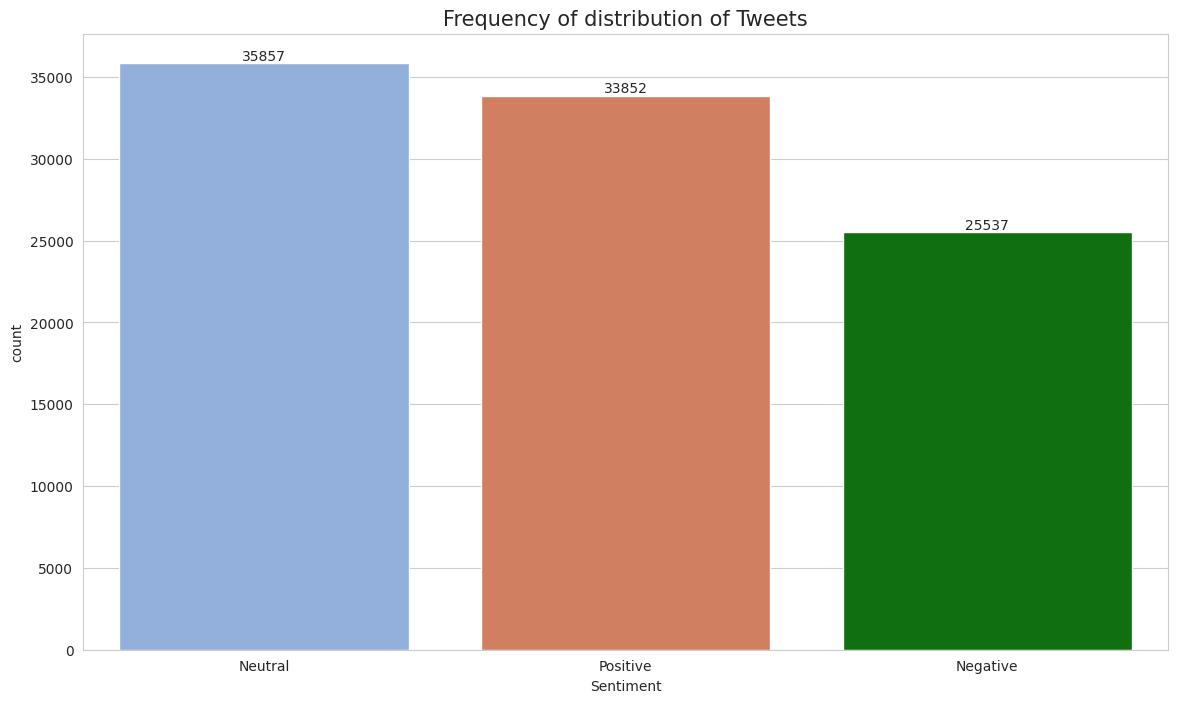

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(14,8))
colors = ['#87ace8','#e3784d', 'green']

ax = sns.countplot(x='Sentiment',data=data, order = data['Sentiment'].value_counts().index, palette=colors)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of distribution of Tweets',fontsize=15)
plt.show()

fig = px.pie(data, names='Sentiment', height=600, width= 600, color_discrete_sequence=colors,
             title='Pie Chart for distribution of Tweets')
fig.update_traces(textfont_size=20)
fig.show()

**Note:**
- It seems the distribution of sentiments of data is fairly competent.

Let's now proceed with further analysis...

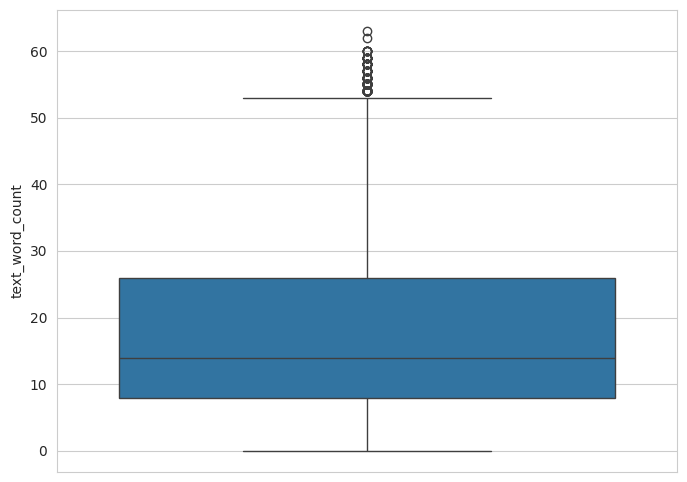

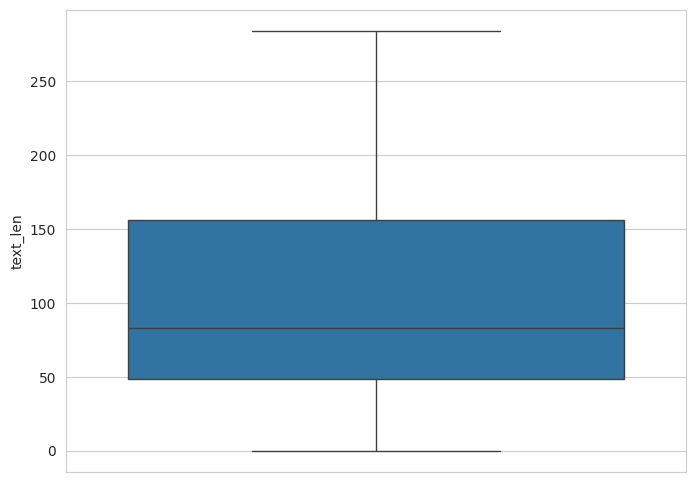

In [ ]:
fig,axes = plt.subplots(figsize=(8,6))
sns.boxplot(y=data['text_word_count'],data=data)
plt.show()

fig,axes = plt.subplots(figsize=(8,6))
sns.boxplot(y=data['text_len'],data=data)
plt.show()

### Sentiment wise Tweet data Analysis

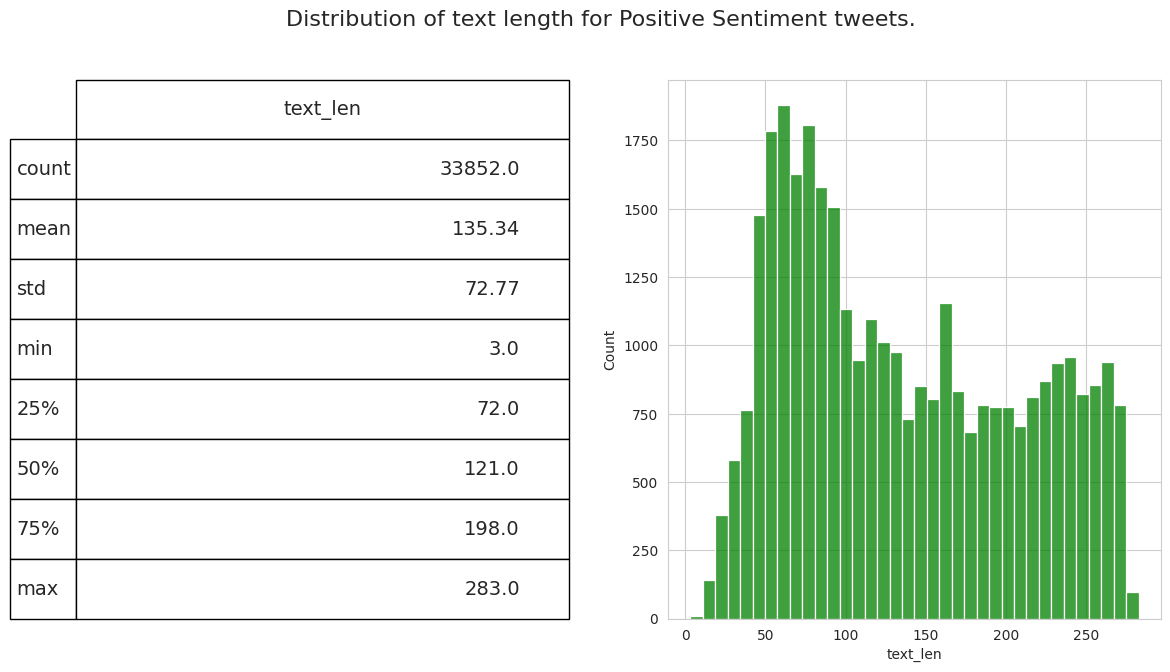

In [ ]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Sentiment']=='Positive']['text_len'], ax=ax1,color='green')
describe = data['text_len'][data['Sentiment']=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Positive Sentiment tweets.', fontsize=16)

plt.show()

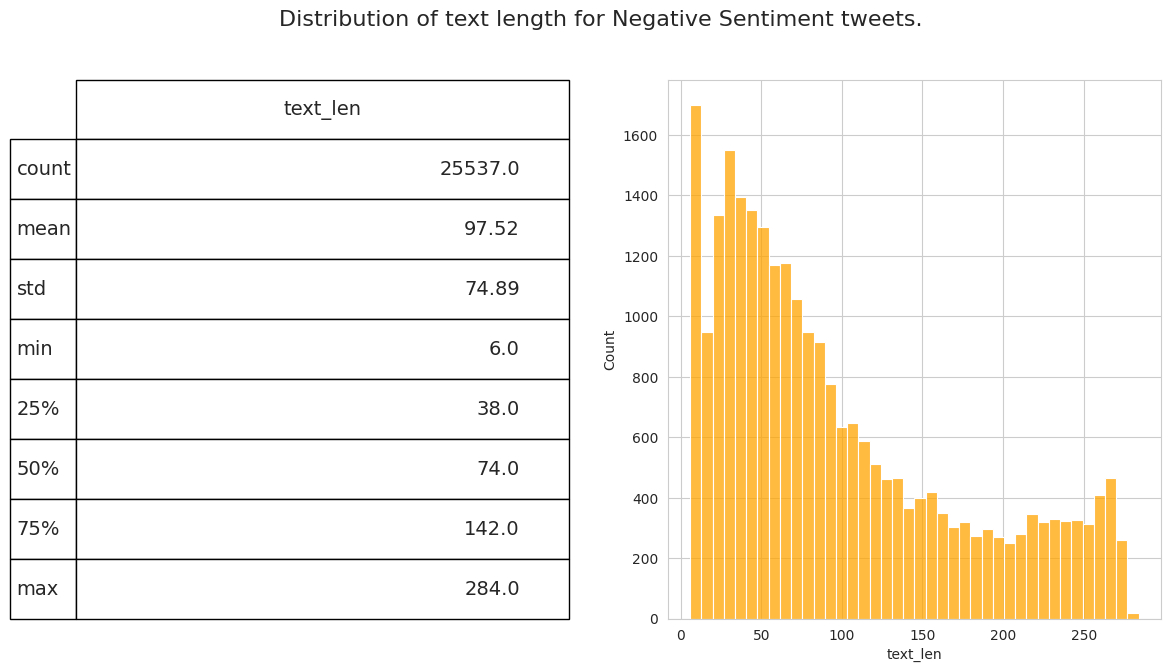

In [ ]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Sentiment']=='Negative']['text_len'], ax=ax1,color='orange')
describe = data['text_len'][data['Sentiment']=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative Sentiment tweets.', fontsize=16)

plt.show()

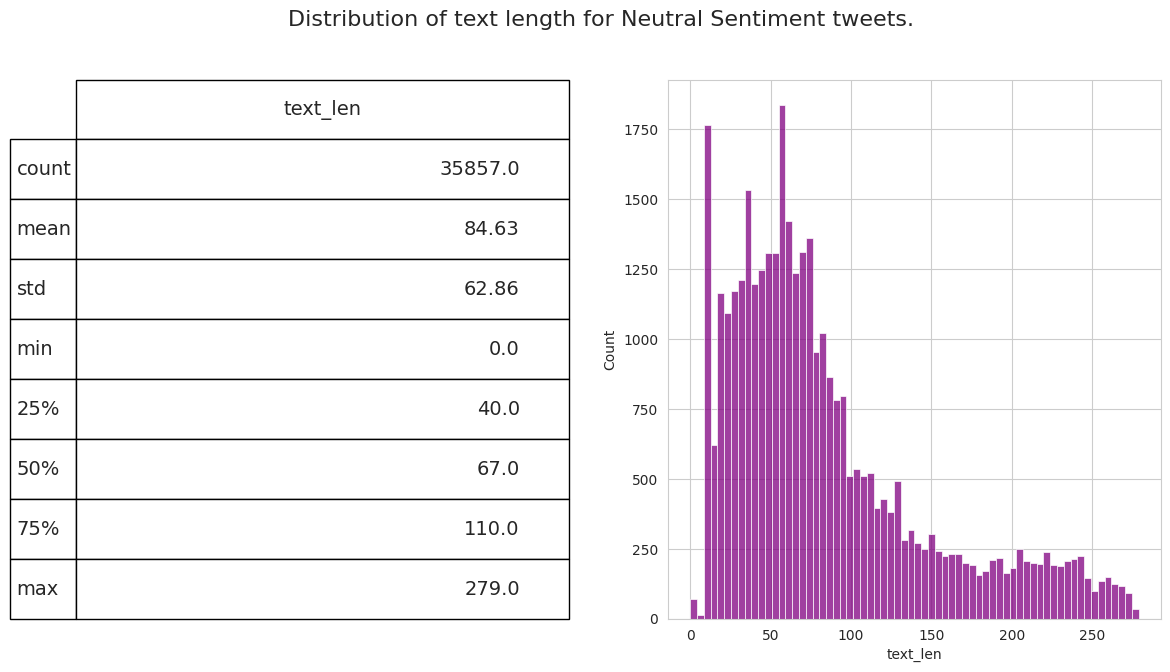

In [ ]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Sentiment']=='Neutral']['text_len'], ax=ax1,color='purple')
describe = data['text_len'][data['Sentiment']=='Neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Neutral Sentiment tweets.', fontsize=16)

plt.show()

### Histograms for Tweet Length and Word Count

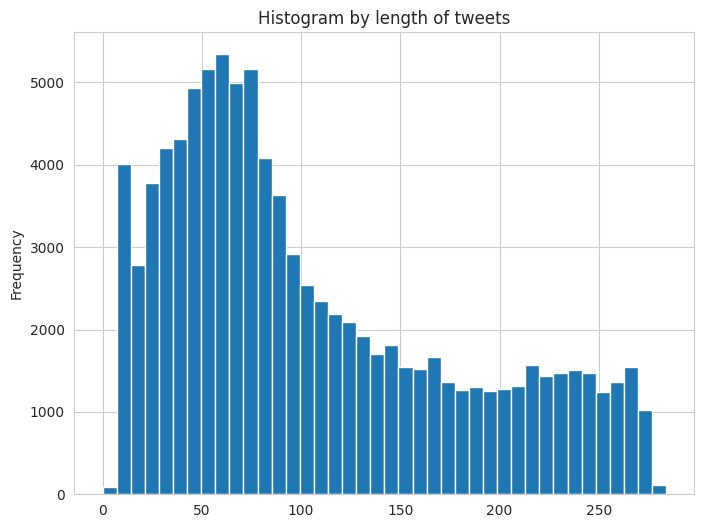

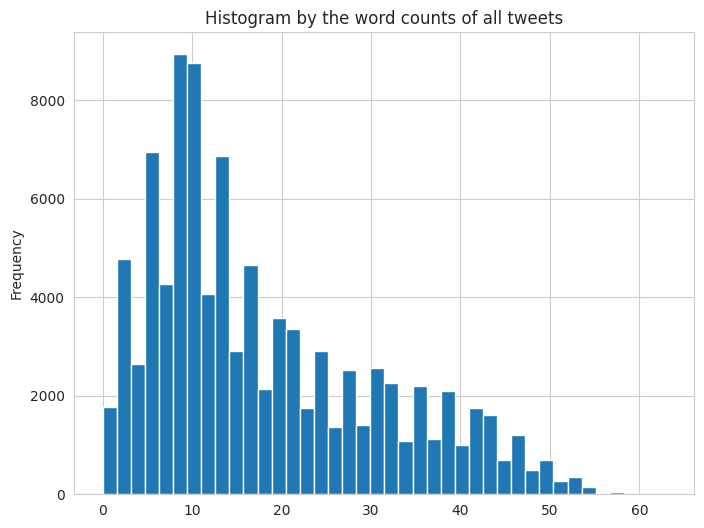

In [ ]:
fig,axes = plt.subplots(figsize=(8,6))
data['text_len'].plot(bins = 40, kind = 'hist',title = 'Histogram by length of tweets')
plt.show()

fig,axes = plt.subplots(figsize=(8,6))
data['text_word_count'].plot(bins = 40, kind = 'hist', title = 'Histogram by the word counts of all tweets')
plt.show()

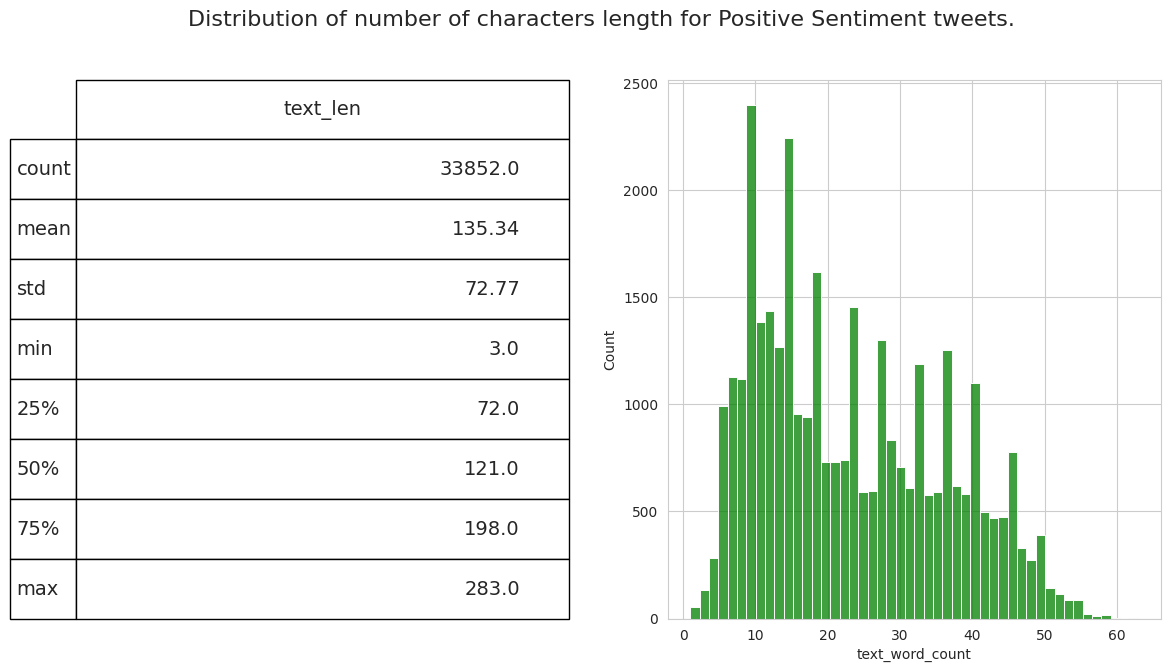

In [ ]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Sentiment']=='Positive']['text_word_count'], ax=ax1,color='green')
describe = data['text_len'][data['Sentiment']=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of number of characters length for Positive Sentiment tweets.', fontsize=16)

plt.show()

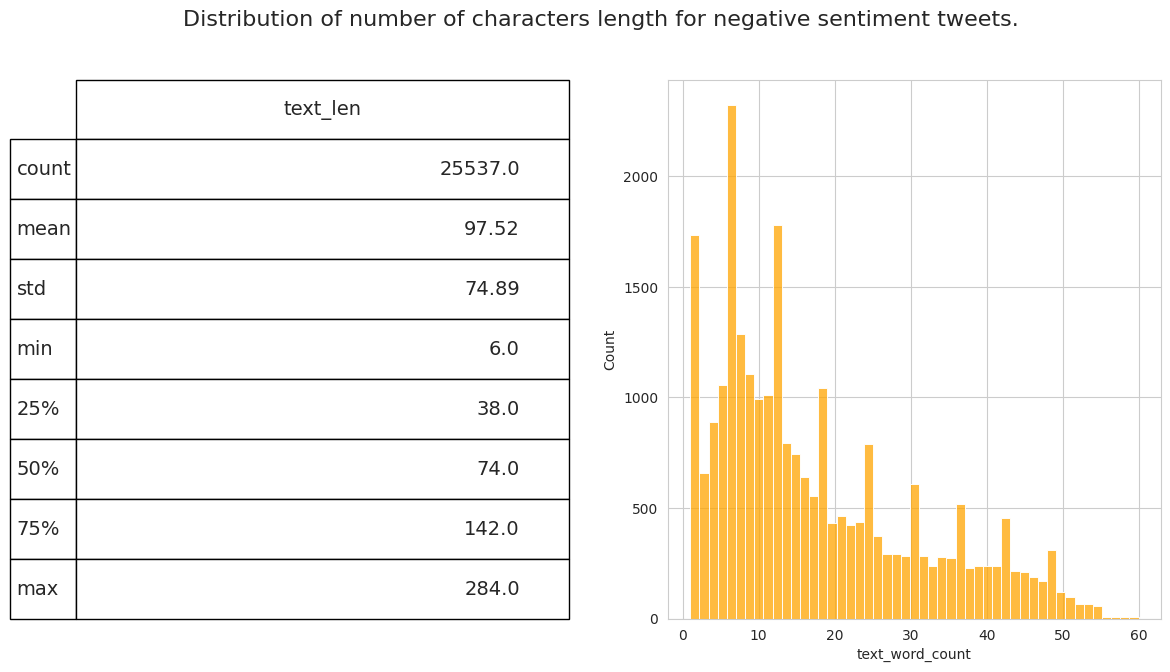

In [ ]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Sentiment']=='Negative']['text_word_count'], ax=ax1,color='orange')
describe = data['text_len'][data['Sentiment']=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of number of characters length for negative sentiment tweets.', fontsize=16)

plt.show()

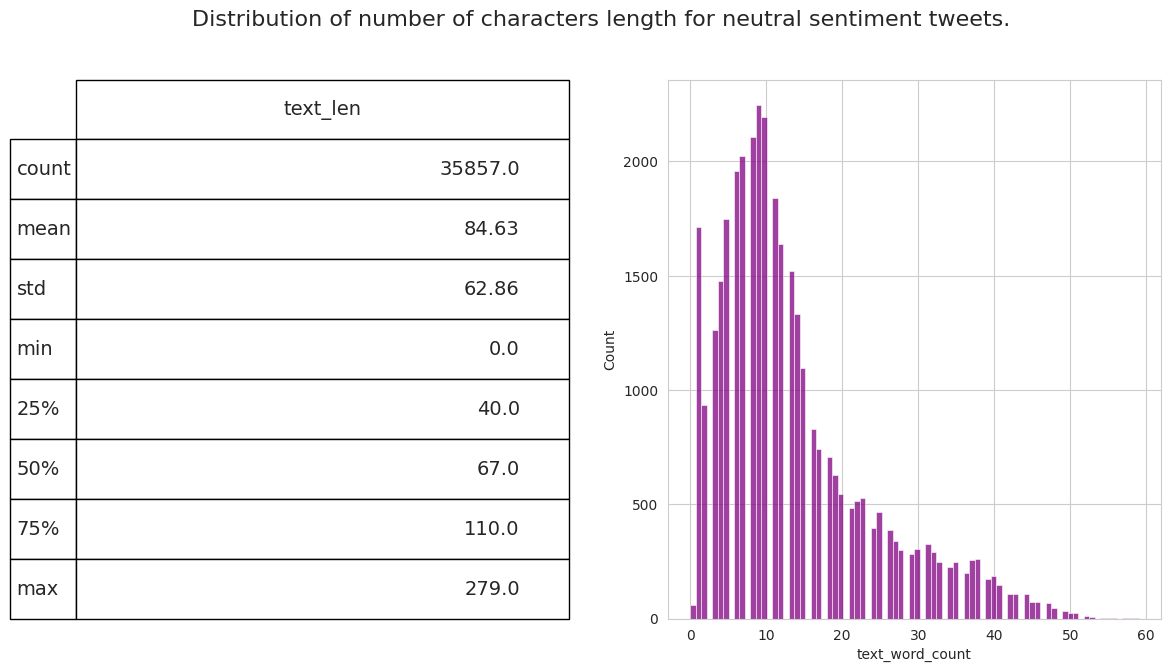

In [ ]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Sentiment']=='Neutral']['text_word_count'], ax=ax1,color='purple')
describe = data['text_len'][data['Sentiment']=='Neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of number of characters length for neutral sentiment tweets.', fontsize=16)

plt.show()

## Most common words in selected_text

In [ ]:
data['temp'] = data['Selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in data['temp'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
0,monkeypox,75459
1,the,54243
2,to,36605
3,and,28875
4,a,27918
5,of,27419
6,in,23746
7,monkey,23100
8,pox,22859
9,is,22288


In [ ]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]

data['temp'] = data['temp'].apply(lambda x:remove_stopword(x))

In [ ]:
top = Counter([item for sublist in data['temp'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','Count']
temp.style.background_gradient(cmap='Reds')

,Common_words,Count
1,monkey,23100
2,pox,22859
3,covid,8070
4,vaccine,7443
5,cases,7355
6,de,6224
7,get,5964
8,health,5681
9,people,4996
10,us,4841


In [ ]:
fig = px.treemap(temp, path=['Common_words'], values='Count',title='Tree of Most Common Words')
fig.show()

In [ ]:
Positive_senti = data[data['Sentiment']=='Positive']
Negative_senti = data[data['Sentiment']=='Negative']
Neutral_senti = data[data['Sentiment']=='Neutral']

#### Positive Sentiment Common words

In [ ]:
# Most common positive words
top = Counter([item for sublist in Positive_senti['temp'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','Count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,Count
0,monkeypox,29467
1,monkey,6582
2,pox,6542
3,new,4375
4,cases,4080
5,first,3705
6,vaccine,3475
7,covid,3294
8,gay,3169
9,health,2967


In [ ]:
fig = px.bar(temp_positive, x="Count", y="Common_words", title='Commmon Words in Selected Text with Positive Sentiments', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

#### Negative Sentiment Common words

In [ ]:
# Most common negative words
top = Counter([item for sublist in Negative_senti['temp'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','Count']
temp_negative.style.background_gradient(cmap='Oranges')

,Common_words,Count
0,monkey,16446
1,pox,16133
2,monkeypox,9966
3,covid,2748
4,get,2027
5,like,1875
6,people,1647
7,vaccine,1498
8,got,1383
9,cases,1080


In [ ]:
fig = px.bar(temp_negative, x="Count", y="Common_words", title='Commmon Words in Selected Text with Negative Sentiments', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

#### Neutral Sentiment Common words

In [ ]:
# Most common neutral words
top = Counter([item for sublist in Neutral_senti['temp'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral.columns = ['Common_words','Count']
temp_neutral.style.background_gradient(cmap='Purples')

,Common_words,Count
0,monkeypox,36026
1,de,5432
2,vaccine,2470
3,cases,2195
4,covid,2028
5,la,1988
6,health,1943
7,virus,1685
8,que,1466
9,get,1302


In [ ]:
fig = px.bar(temp_neutral, x="Count", y="Common_words", title='Commmon Words in Selected Text with Positive Sentiments', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

### WordClouds for Tweet data Sentiment wise.

In [ ]:
# Importing Twitter Logo
url = "https://img.icons8.com/ios-filled/200/twitterx--v1.png"
response = requests.get(url)
image = np.array(Image.open(BytesIO(response.content)))

In [ ]:
# Function to generate the blue colour for the Word CLoud

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

In [ ]:
def wordcount_gen(df, category):

    combined_tweets = " ".join([tweet for tweet in df[df.Sentiment==category]['Selected_text']])

    wc = WordCloud(background_color='white',
                   max_words=1500,
                   stopwords = STOPWORDS
                  , mask=image)

    wc.generate(combined_tweets)

    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(18)

    plt.imshow(wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()

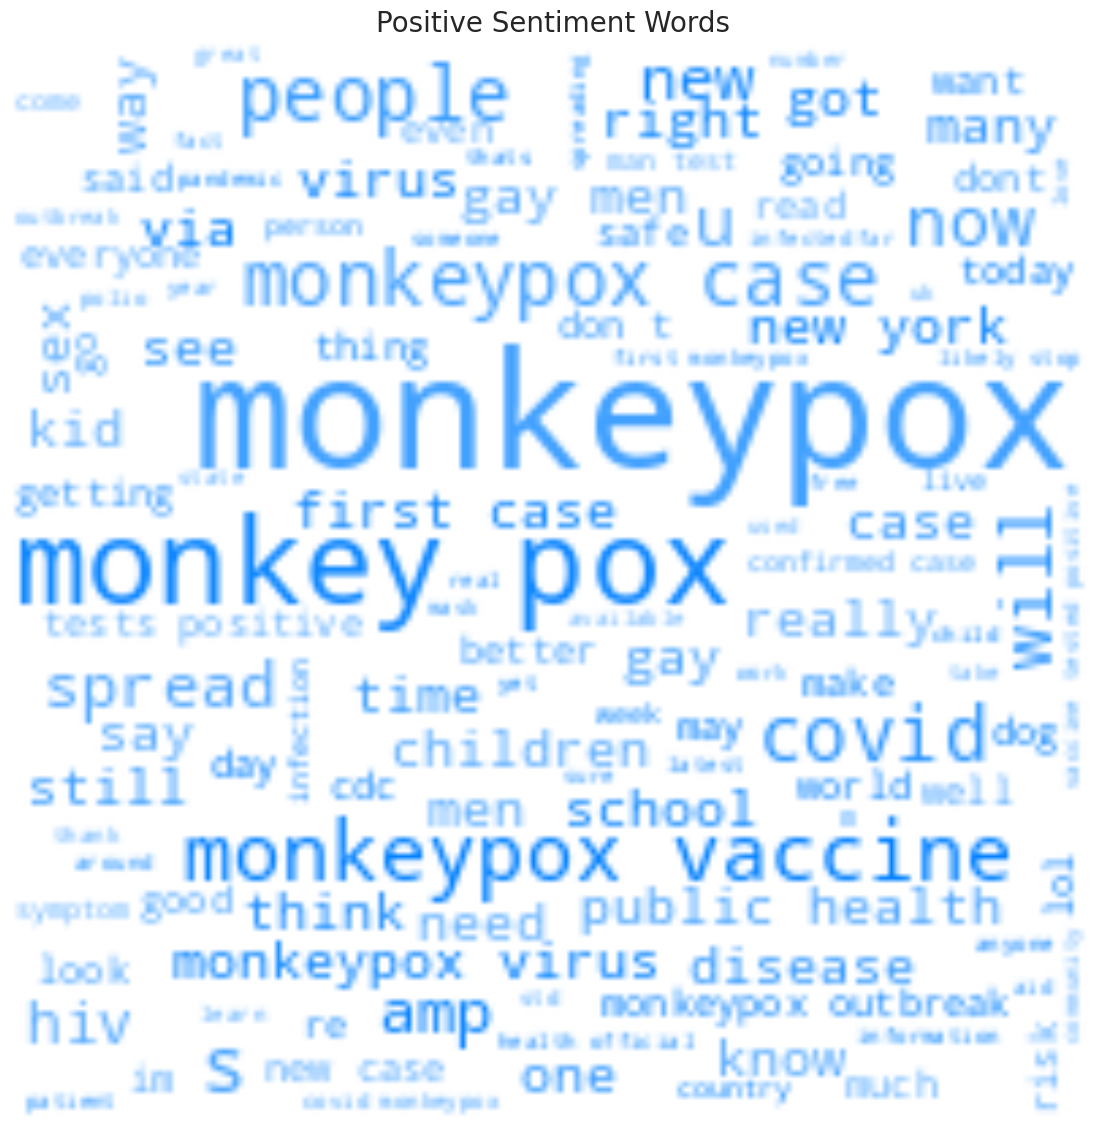

In [ ]:
# Positive tweet words
wordcount_gen(data, 'Positive')

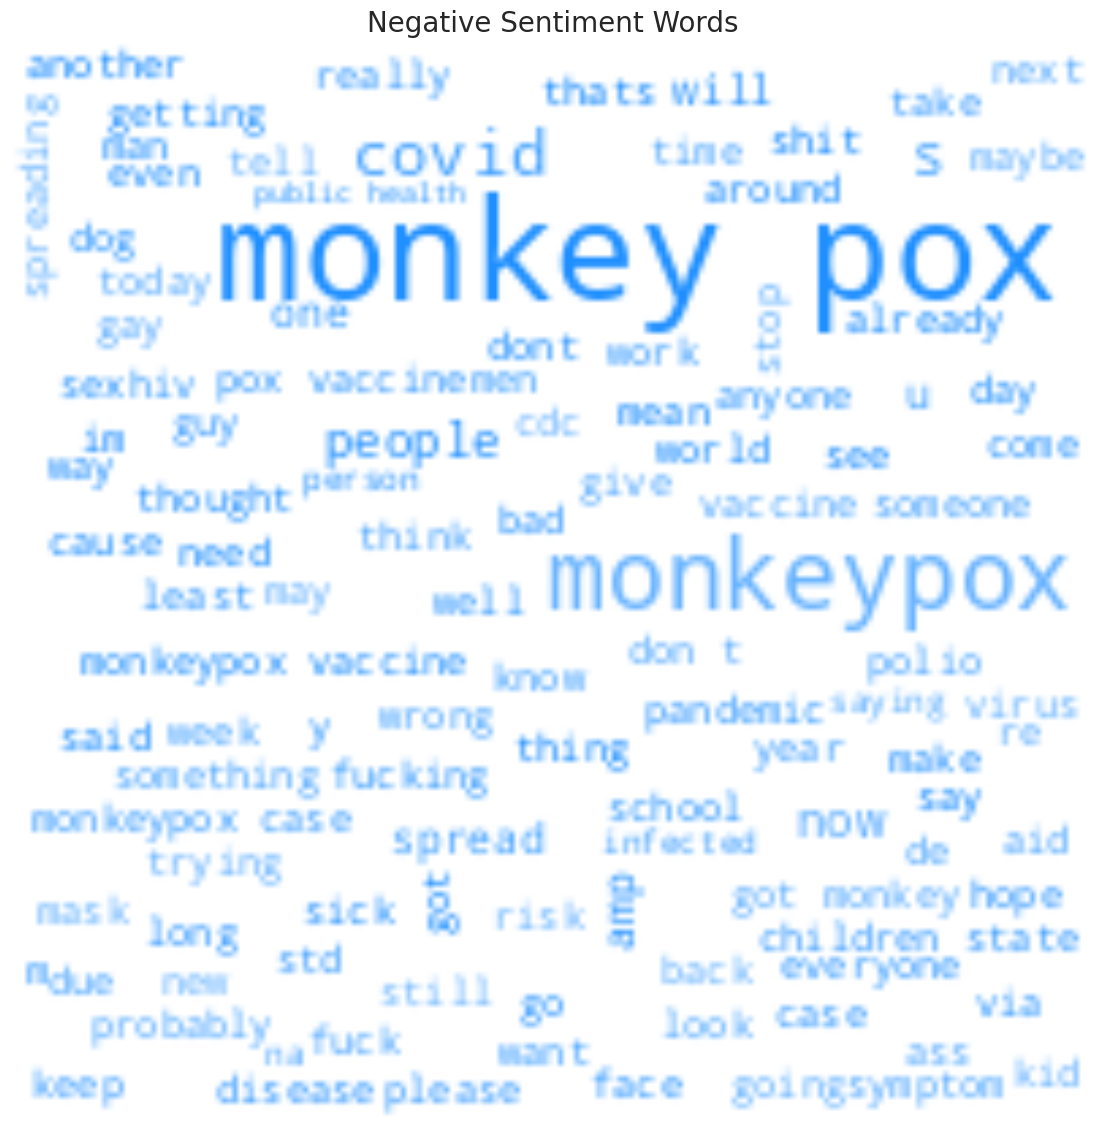

In [ ]:
# Negative tweet words
wordcount_gen(data, 'Negative')

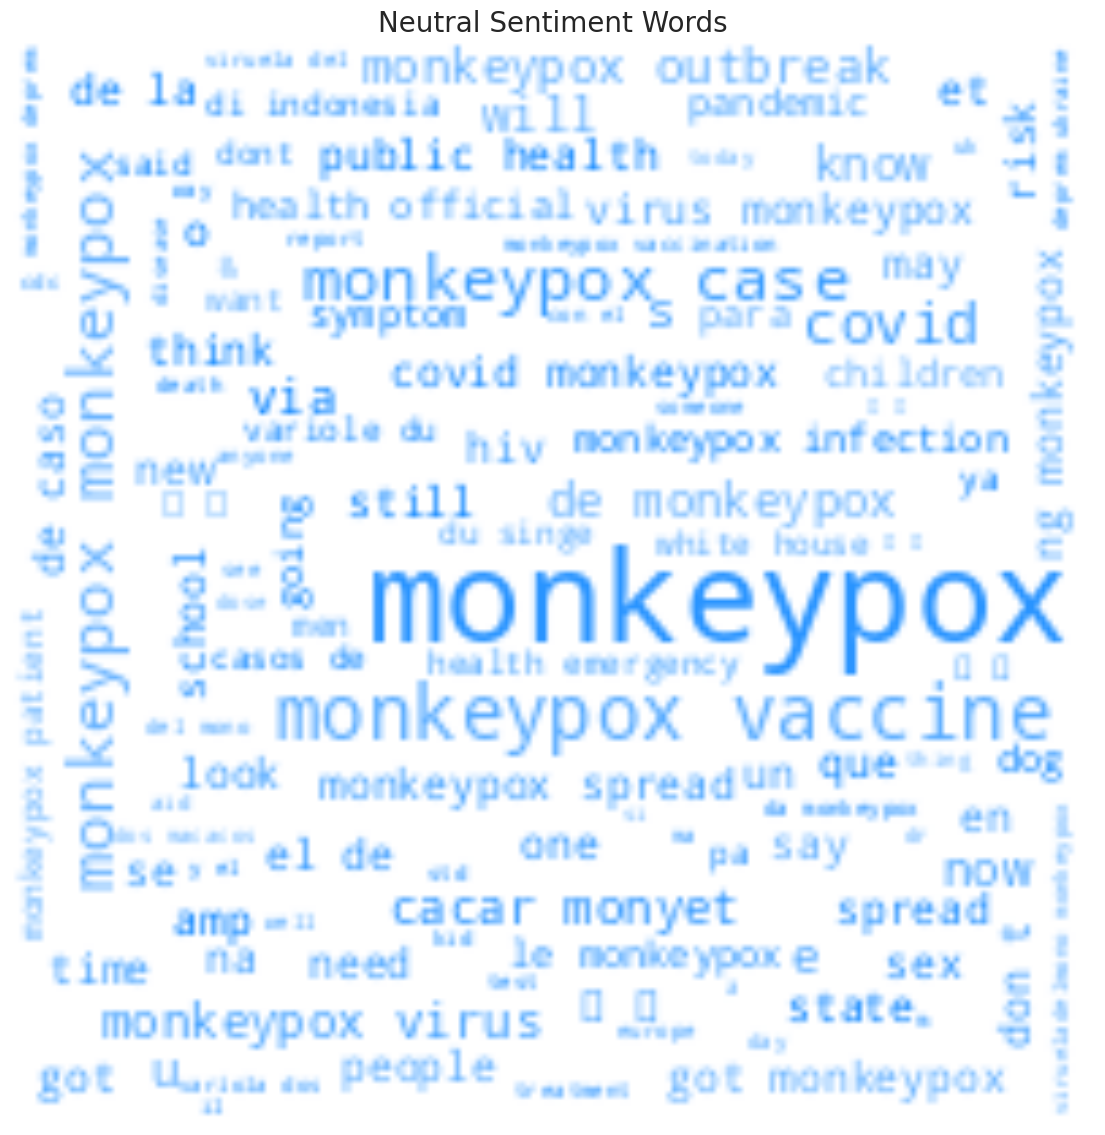

In [ ]:
# Neutral tweet words
wordcount_gen(data, 'Neutral')

## Data preprocessing again for Modeling

In [ ]:
def tweet_to_words(tweet):
    text = tweet.lower()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    words = text.split()
    words = [w for w in words if w not in stopwords.words("english")]

    # Applying stemming
    words = [PorterStemmer().stem(w) for w in words]

    return words

In [ ]:
print("\nOriginal tweet ->", data['Selected_text'][0])
print("\nProcessed tweet ->", tweet_to_words(data['Selected_text'][0]))


Original tweet -> theyre useful to the vice lords the black gangster disciples the latin kings laraza sexual degenerates spreading monkey pox and sexually grooming our children

Processed tweet -> ['theyr', 'use', 'vice', 'lord', 'black', 'gangster', 'discipl', 'latin', 'king', 'laraza', 'sexual', 'degener', 'spread', 'monkey', 'pox', 'sexual', 'groom', 'children']


In [ ]:
# Applying data processing to each tweet
X = list(map(tweet_to_words, data['Selected_text']))

### Sentiment Encoding

Machine learning algorithms require numerical labels for training and prediction. Our sentiment categories ("Negative," "Neutral," and "Positive") are categorical and thus need to be converted into a numerical format. This process is known as sentiment encoding.

We utilized the LabelEncoder from the sklearn.preprocessing library to perform this encoding. The LabelEncoder is a utility class to help normalize labels such that they contain values from 0 to n_classes-1.

The process involved the following steps:

* **Initialization:** An instance of the LabelEncoder was created.
* **Fitting and Transformation:** The LabelEncoder was fitted to the Sentiment column of our dataset. During this fitting process, the encoder learns the unique sentiment categories and assigns a unique integer to each category. For example, it might assign 0 to "Negative", 1 to "Neutral", and 2 to "Positive" (the specific assignment order is determined alphabetically by default). After fitting, it transforms the categorical labels into their corresponding numerical representations.

```
le = LabelEncoder()
Y = le.fit_transform(data['Sentiment'])
```

The resulting numerical array, stored in the variable Y, represents the target variable for our SVM model. Each numerical value in Y corresponds to the sentiment category of the respective tweet in the dataset.

This encoded numerical representation of the sentiment labels, along with the TF-IDF features, served as the input for training and evaluating the Support Vector Machine model.

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(data['Sentiment'])

print(X[0])
print(Y[0])

## Data Splitting

To evaluate the performance of our sentiment classification model accurately and ensure it generalizes well to unseen data, the dataset was split into distinct training and testing sets. The training set is used to train the Support Vector Machine model, while the testing set is reserved to assess the model's performance on data it has not encountered during training. This helps to provide an unbiased evaluation of the model's ability to classify new tweets.

We utilized the train_test_split function from the sklearn.model_selection library to perform this split. The process involved dividing the preprocessed text data (data['Selected_text']) and the corresponding sentiment labels (Y) into training and testing subsets.

The splitting was performed with the following parameters:

* test_size=0.2: This parameter specifies the proportion of the dataset that should be allocated to the testing set. In our case, 0.2 means that 20% of the data was used for testing, and the remaining 80% was used for training. This is a common split ratio in machine learning projects.
* random_state=1: This parameter ensures that the split is reproducible. By setting a specific integer value for random_state, the same split will be generated every time the code is run. This is important for debugging and comparing results consistently.

The output of the train_test_split function resulted in four variables:

* X_train_text: The preprocessed text data for training.
* X_test_text: The preprocessed text data for testing.
* y_train: The encoded sentiment labels corresponding to the training data.
* y_test: The encoded sentiment labels corresponding to the testing data.

These split datasets were then used for the subsequent feature extraction (TF-IDF) and model training/evaluation steps. It's important to note that the TF-IDF vectorizer was fitted only on X_train_text and then used to transform both X_train_text and X_test_text, as discussed in the previous section, to prevent data leakage.

In [ ]:
# Split the preprocessed text data and numerical labels
X_train_text, X_test_text, y_train, y_test = train_test_split(data['Selected_text'], Y, test_size=0.2, random_state=1)
# Note: We don't need a separate validation set for this basic SVM implementation
# If you need validation for hyperparameter tuning, you would split X_train_text and y_train again


### Feature Extraction (Term Frequency-Inverse Document Frequency (TF-IDF))

Machine learning algorithms, including Support Vector Machines (SVMs), require numerical input. Therefore, the preprocessed text data from the Selected_text column, which is in the form of strings or lists of tokens, needs to be converted into a numerical representation. This process is known as feature extraction.

For this project, we employed the Term Frequency-Inverse Document Frequency (TF-IDF) technique. TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents (in our case, the collection of tweets). It considers both the frequency of a word within a specific document and its frequency across the entire dataset.

The logic behind TF-IDF is that words that appear frequently in a particular document but rarely across the entire corpus are likely to be more relevant to that document than words that appear frequently everywhere.

TF-IDF is calculated in two parts:

1. **Term Frequency (TF):** This measures how frequently a term appears in a document. A simple way to calculate TF is by dividing the number of times a term appears in a document by the total number of terms in that document.

$$ \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d} $$

2. **Inverse Document Frequency (IDF):** This measures how important a term is across the entire corpus. It is calculated by taking the logarithm of the total number of documents divided by the number of documents containing the term. This gives more weight to terms that are rare across the corpus.

$$ \text{IDF}(t, D) = \log\left(\frac{\text{Total number of documents } |D|}{\text{Number of documents containing term } t}\right) $$


The TF-IDF score for a term in a document is then the product of its TF and IDF:

$$ \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D) $$$$ \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D) $$


In our implementation, we used the TfidfVectorizer class from the sklearn.feature_extraction.text module. This vectorizer handles the entire process of tokenization (using the processed text from tweet_to_words), building a vocabulary, and computing the TF-IDF scores for each term in each tweet.

The TfidfVectorizer was initialized with the max_features parameter set to 5000. This parameter limits the vocabulary size to the 5000 most frequent terms encountered in the training data. This helps to manage the dimensionality of the feature space, preventing the model from becoming too complex and potentially overfitting to rare words.

The process of feature extraction involved the following steps:

1. **Initialization:** An instance of TfidfVectorizer was created with the specified max_features.
2. **Fitting and Transformation (Training Data):** The vectorizer was fitted on the preprocessed text data of the training set (X_train_text). During the fitting process, the vectorizer learns the vocabulary and computes the IDF values based on the term distribution in the training corpus. After fitting, it transforms the training text into a matrix of TF-IDF scores (X_train_features).
3. **Transformation (Testing Data):** The same fitted vectorizer was then used to transform the preprocessed text data of the testing set (X_test_text) into a matrix of TF-IDF scores (X_test_features). It is crucial to only transform the test data and not fit the vectorizer on it, as this prevents data leakage from the test set into the training process.

The output of the TF-IDF vectorization is a sparse matrix where each row represents a tweet, each column represents a unique term in the vocabulary, and the values in the matrix are the TF-IDF scores. This numerical representation served as the input features for training the SVM model.

In [ ]:
# TF-IDF Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_features = tfidf_vectorizer.fit_transform(X_train_text)
X_test_features = tfidf_vectorizer.transform(X_test_text)

print("TF-IDF features created.")
print("Shape of X_train_features:", X_train_features.shape)
print("Shape of X_test_features:", X_test_features.shape)


### Model Selection and Training: Support Vector Machine (SVM)

For the task of sentiment classification of monkeypox-related tweets, we selected the Support Vector Machine (SVM) algorithm. SVMs are powerful supervised machine learning models widely used for classification and regression tasks, particularly effective in handling high-dimensional data, such as the numerical feature vectors generated from text using TF-IDF.

**Understanding the Support Vector Machine (SVM):**

At its core, an SVM works by finding an optimal hyperplane that distinctly separates the different classes in the feature space. For a binary classification problem (like classifying into two sentiments), the SVM aims to find a hyperplane that maximizes the margin between the two classes. The margin is defined as the distance between the hyperplane and the nearest data points from each class, known as the support vectors. By maximizing this margin, the SVM aims to improve the generalization ability of the model to new, unseen data.

In the case of multi-class classification, like our three sentiment categories (Negative, Neutral, Positive), SVM typically uses strategies like "one-vs.-rest" or "one-vs.-one" to extend the binary classification concept. The scikit-learn implementation handles this internally.

SVMs can use different types of kernels to find decision boundaries. A linear kernel finds a linear hyperplane to separate classes. For text classification with TF-IDF features, where data often lies in a high-dimensional space, a linear separation can be quite effective. Non-linear kernels (like polynomial or radial basis function) can find curved decision boundaries but can also increase complexity and risk overfitting.

**Implementation with Scikit-learn:**

We used the SVC (Support Vector Classifier) class from the sklearn.svm module to implement the SVM model. The model was initialized with specific parameters to control its behavior:

* kernel='linear': We chose a linear kernel. This means the SVM will attempt to find a linear decision boundary in the high-dimensional TF-IDF feature space to separate the sentiment classes. A linear kernel is often a good starting point for text classification with sparse features like TF-IDF due to its simplicity and effectiveness.
* C=1.0: This is the regularization parameter. The C parameter controls the trade-off between correctly classifying training examples and maximizing the margin. A smaller C creates a larger margin but allows for more misclassifications on the training data (more regularization), while a larger C creates a smaller margin but aims to classify all training examples correctly (less regularization). The default value of 1.0 was used initially. This parameter can be tuned to potentially improve model performance.
The model was then trained using the fit() method:

``````
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_features, y_train)
``````
The training process involved the SVM algorithm learning the optimal hyperplane (defined by its weights and bias) based on the TF-IDF features (X_train_features) and the corresponding encoded sentiment labels (y_train) from the training dataset. The support vectors identified during this process are the data points that are closest to the decision boundary and play a crucial role in defining the hyperplane.

After the fit() method completes, the svm_model object is trained and ready to make predictions on new, unseen data.

In [ ]:
# SVM Model Definition and Training
svm_model = SVC(kernel='linear', C=1.0) # Start with a linear kernel, adjust C if needed

print("Training the SVM model...")
svm_model.fit(X_train_features, y_train)
print("SVM model training complete.")

Training the SVM model...
SVM model training complete.


### Model Evaluation
After training the Support Vector Machine model on the training dataset, it is essential to evaluate its performance on the unseen test dataset to assess its ability to generalize to new data. Model evaluation helps us understand how well the model is likely to perform in a real-world scenario and identify areas for potential improvement.

We used the trained svm_model to make predictions on the TF-IDF features of the test dataset (X_test_features):

y_pred = svm_model.predict(X_test_features)

These predictions (y_pred) are the numerical sentiment labels predicted by the model for each tweet in the test set. To understand the model's performance, we compared these predictions against the actual sentiment labels (y_test) for the test set.

We employed standard classification evaluation metrics provided by the sklearn.metrics module:

1. Confusion Matrix: The confusion matrix is a table that summarizes the performance of a classification model on a set of test data. It shows the number of:

  * **True Positives (TP):** Instances correctly predicted as positive (e.g., actually Negative and predicted Negative).
  * **True Negatives (TN):** Instances correctly predicted as negative (e.g., actually Neutral and predicted Neutral).
  * **False Positives (FP):** Instances incorrectly predicted as positive (e.g., actually Neutral but predicted Negative). This is also known as a Type I error.
  * **False Negatives (FN):** Instances incorrectly predicted as negative (e.g., actually Negative but predicted Neutral). This is also known as a Type II error.

  For our multi-class classification problem (Negative, Neutral, Positive), the confusion matrix is a $3 \times 3$ matrix where each row represents the instances in an actual class, and each column represents the instances in a predicted class. The diagonal elements indicate the number of correct predictions for each class.

  We generated the confusion matrix using the confusion_matrix function:
  ```
  confusion_matrix(y_test, y_pred)
  ```

  Analyzing the confusion matrix allows us to see where the model is making mistakes (e.g., confusing Negative tweets with Neutral tweets).

2. **Classification Report:** The classification report provides key evaluation metrics for each class, as well as overall averages. We generated the classification report using the classification_report function:
```
print(classification_report(y_test, y_pred, target_names=le.classes_))
```

  The target_names parameter is used to display the original sentiment labels ("Negative", "Neutral", "Positive") in the report, making it easier to interpret. The report includes the following metrics for each class:

  * **Precision:** This metric answers the question: "Of all the instances the model *predicted* as belonging to this class, how many were actually in this class?" It is calculated as:
    $$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$
    High precision for a class indicates that when the model predicts that class, it is usually correct.

  * **Recall (Sensitivity):** This metric answers the question: "Of all the instances that *actually* belong to this class, how many did the model correctly identify?" It is calculated as:
    $$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$
    
    High recall for a class indicates that the model is good at finding all the instances of that class.

  * **F1-Score:** The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. It is particularly useful when the classes have imbalanced distributions.
    $$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

  * **Support:** This is simply the number of actual occurrences of the class in the specified dataset (in this case, the test set).

The classification report also provides overall average metrics (macro average, weighted average), which summarize the performance across all classes.
By analyzing the confusion matrix and classification report, we can gain a comprehensive understanding of our SVM model's performance in classifying the sentiment of monkeypox-related tweets.

### Plotting Confusion Matrix

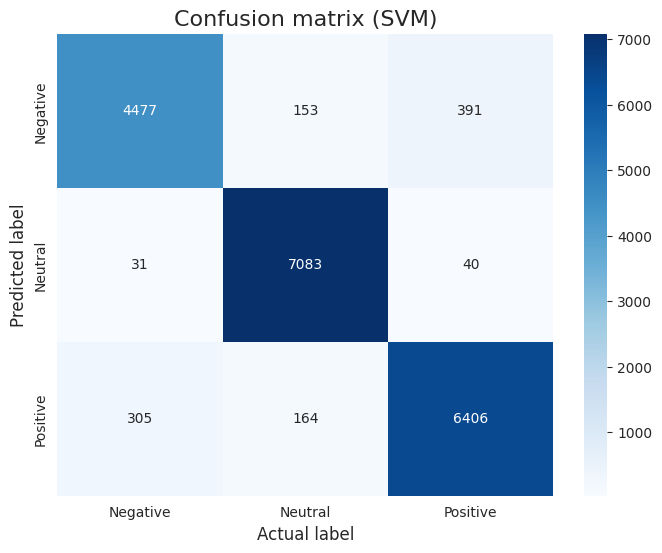


Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.89      0.91      5021
     Neutral       0.96      0.99      0.97      7154
    Positive       0.94      0.93      0.93      6875

    accuracy                           0.94     19050
   macro avg       0.94      0.94      0.94     19050
weighted avg       0.94      0.94      0.94     19050



In [ ]:
# Plotting Confusion Matrix for SVM
sentiment_classes = ['Negative', 'Neutral', 'Positive']
y_pred = svm_model.predict(X_test_features)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix (SVM)', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=sentiment_classes))

*   **Reason:** This code calculates and plots the confusion matrix for the SVM model's predictions and also prints a detailed classification report.


## Saving the Model Architecture & the Weights

In [ ]:
def predict_sentiment_svm(text_list):
            sentiment_classes = ['Negative', 'Neutral', 'Positive']
            processed_texts = []
            for text in text_list:
                # Apply the same preprocessing steps
                processed_text = process_tweets(text)
                processed_words = tweet_to_words(processed_text)
                processed_texts.append(" ".join(processed_words)) # Join words back for vectorizer

            # Transform the processed text using the trained TF-IDF vectorizer
            text_features = tfidf_vectorizer.transform(processed_texts)

            # Make prediction using the trained SVM model
            predictions = svm_model.predict(text_features)

            # Print predictions for each input text
            for i, prediction in enumerate(predictions):
                 predicted_sentiment = sentiment_classes[prediction]
                 print(f'Input: "{text_list[i]}" -> Predicted sentiment: {predicted_sentiment}')

### Prediction Function
To showcase the practical application of our trained sentiment classification model, a function named predict_sentiment_svm was developed. This function allows for classifying the sentiment of individual raw tweet text inputs using the trained SVM model and the established preprocessing and feature extraction pipeline.

The predict_sentiment_svm function takes a single raw tweet string as input and performs the necessary steps to prepare the text and feed it into the trained model for prediction. The steps involved within the function are as follows:

1. **Apply Initial Preprocessing:** The input raw tweet text is first passed through the process_tweets function. This applies the same initial cleaning steps used during the dataset preprocessing (converting to lowercase, removing URLs, mentions, punctuation, emojis, etc.).
2. **Apply Further Text Normalization:** The cleaned text is then processed by the tweet_to_words function. This breaks the text into tokens, removes stopwords, and applies Porter Stemming, just as was done for the training data. The output of this step is a list of processed tokens.
3. **Reconstruct Text for Vectorization:** The list of processed tokens is joined back into a single string. This format is required by the TfidfVectorizer.
4. **Feature Extraction (TF-IDF Transformation):** The preprocessed and reconstructed text is then transformed into a numerical feature vector using the same tfidf_vectorizer that was fitted on the training data. It is critical to use the fitted vectorizer here to ensure the new text is represented in the same feature space as the training data. The output is a TF-IDF sparse matrix, even for a single tweet.
5. **Model Prediction:** The resulting TF-IDF feature vector is passed to the trained svm_model's predict() method. The model outputs a numerical prediction, which corresponds to one of the encoded sentiment classes (0, 1, or 2).
6. **Decode Sentiment:** The numerical prediction is then decoded back into its original categorical sentiment label ("Negative", "Neutral", or "Positive") using the sentiment_classes list and the LabelEncoder's mapping.

The function then returns the predicted sentiment label (e.g., "Negative", "Neutral", or "Positive") as a human-readable string.

This predict_sentiment_svm function serves as a demonstration of how the trained model can be integrated into a system to classify the sentiment of new, incoming tweets without requiring manual labeling. It ensures that the new data undergoes the identical processing pipeline as the data the model was trained on, which is crucial for accurate prediction.

## User testing demos..

In [ ]:
# predict_class(['MonkeyPox is a bit deadly'])
predict_sentiment_svm(['MonkeyPox is a bit deadly'])

Input: "MonkeyPox is a bit deadly" -> Predicted sentiment: Neutral


In [ ]:
# predict_class(['MonkeyPox has not caused so many deaths'])
predict_sentiment_svm(['MonkeyPox has not caused so many deaths'])

Input: "MonkeyPox has not caused so many deaths" -> Predicted sentiment: Neutral


In [ ]:
# predict_class(['Monkeypox is not airborne'])
predict_sentiment_svm(['Monkeypox is not airborne'])

Input: "Monkeypox is not airborne" -> Predicted sentiment: Neutral


*   **Reason:** This adapted function preprocesses the input text, applies the TF-IDF vectorizer, and uses the trained SVM model to predict the sentiment.